In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


Load the dataset

In [3]:
data = pd.read_csv("dataset\landslide_full_dataset.csv")

Display the first few rows of the dataset

In [4]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Slope  Soil Moisture  Barometric Pressure  Rainfall  Soil Temperature  \
0  50.01          25.87               914.28    112.69              6.64   
1  44.54          21.87               988.90    143.68              6.76   
2  11.86          14.78               952.57     19.55             25.70   
3   7.49          15.17              1046.20     36.91             14.57   
4  21.54          19.53               971.56      0.92             21.26   

   Groundwater Level  Soil Shear Strength  Surface Displacement  \
0               0.78                 5.84                 14.71   
1               0.32                23.78                 13.74   
2               3.05                28.75                  0.48   
3               2.29                21.80                  0.80   
4               2.69                24.55                  0.23   

   Seismic Activity  Soil Density  Vegetation Cover  Vibration  Landslide  
0              2.35          1.56             1

Step 1: Select Relevant Features


In [5]:
features = ["Slope", "Soil Moisture", "Barometric Pressure", "Rainfall", "Vibration"]
data = data[features + ["Landslide"]]
print("\nSelected Features:")
print(data.head())


Selected Features:
   Slope  Soil Moisture  Barometric Pressure  Rainfall  Vibration  Landslide
0  50.01          25.87               914.28    112.69          1          1
1  44.54          21.87               988.90    143.68          1          1
2  11.86          14.78               952.57     19.55          0          0
3   7.49          15.17              1046.20     36.91          0          0
4  21.54          19.53               971.56      0.92          0          0


Step 2: Handle Missing Values


In [ ]:
print("\nChecking for missing values...")
print(data.isnull().sum())


Checking for missing values...
Slope                  0
Soil Moisture          0
Barometric Pressure    0
Rainfall               0
Vibration              0
Landslide              0
dtype: int64


Impute missing values with mean (or other suitable strategies)
- skipping because no missing values

In [ ]:

# data.fillna(data.mean(), inplace=True)
# print("\nMissing values handled. Any remaining missing values:")
# print(data.isnull().sum())


Step 3: Handle Categorical Data (Vibration)


In [8]:
print("\nEncoding 'Vibration' and 'Landslide' features...")
label_encoders = {}
for column in ["Vibration", "Landslide"]:
    if data[column].dtype == object:
        print(f"Converting '{column}' to numeric...")
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

print("\nUnique values after encoding:")
print("Vibration:", data["Vibration"].unique())
print("Landslide:", data["Landslide"].unique())



Encoding 'Vibration' and 'Landslide' features...

Unique values after encoding:
Vibration: [1 0]
Landslide: [1 0]


Step 4: Visualize Data Distributions



Visualizing data distributions...


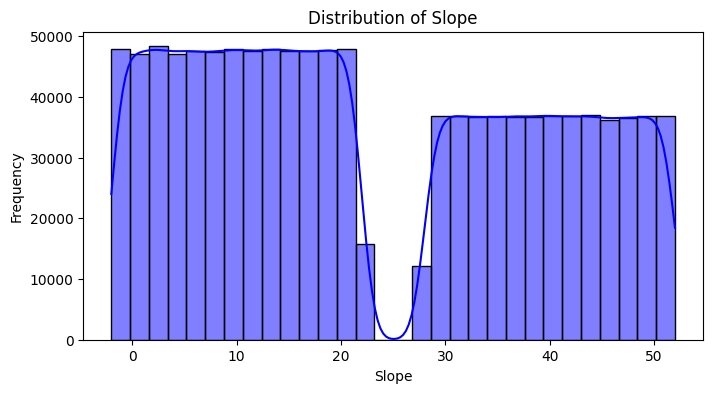

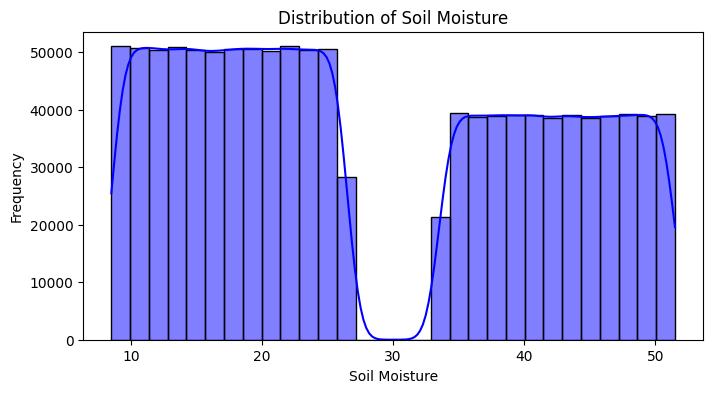

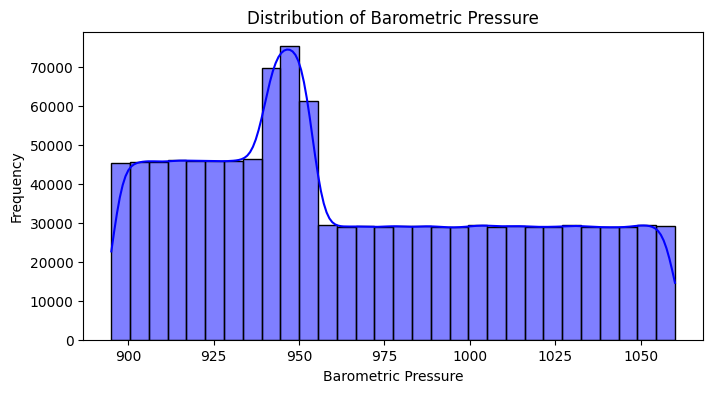

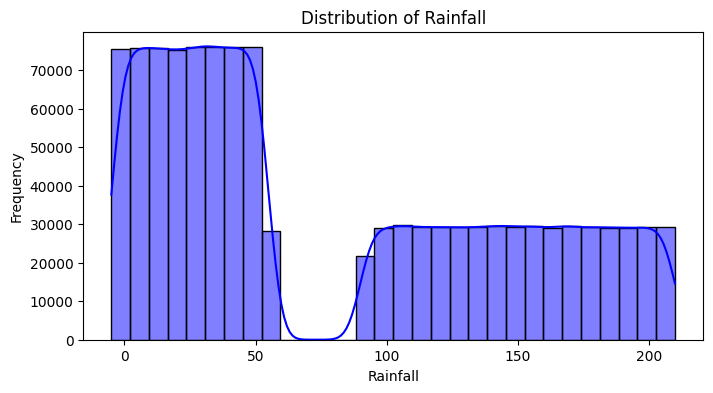

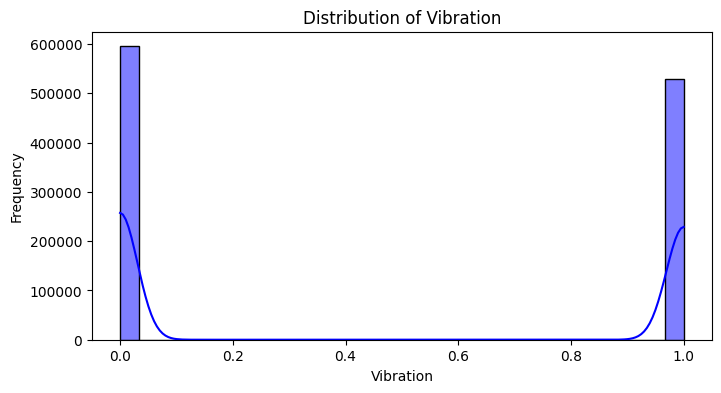

In [9]:
print("\nVisualizing data distributions...")
for column in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

Step 5: Correlation Analysis



Analyzing feature correlations...


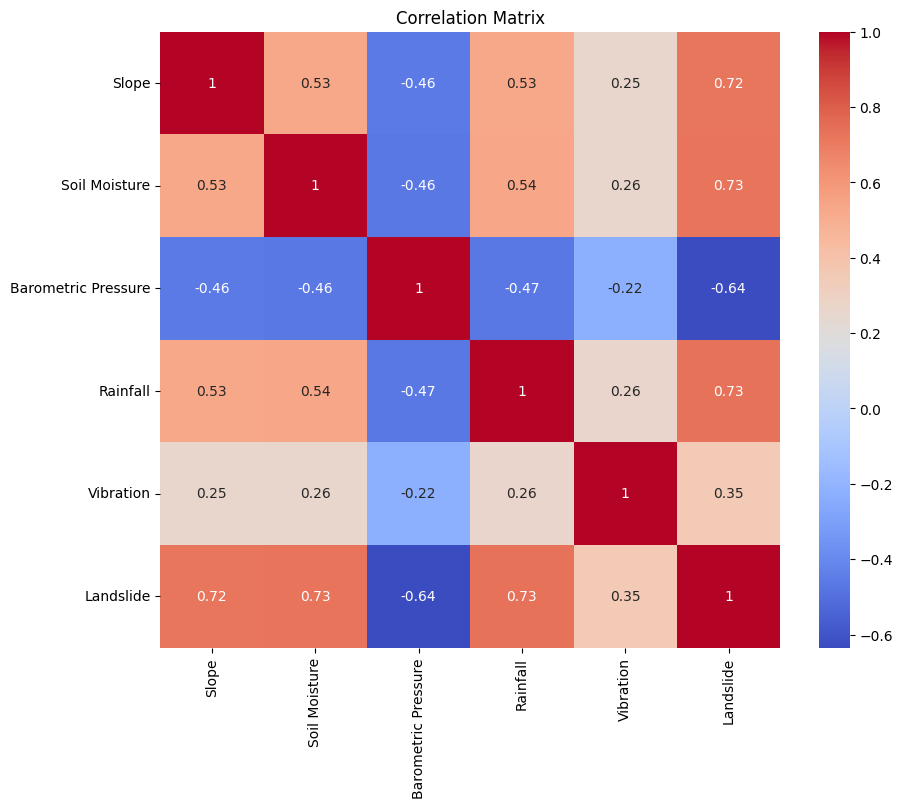

In [10]:
print("\nAnalyzing feature correlations...")
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Step 6: Save processed csv



In [11]:

processed_file_path = "/dataset/pre_processed/Lprocessed_landslide_dataset.csv"
data.to_csv(processed_file_path, index=False)
